# Processamento de Imagens em Python: scikit-image

![](python-logo.png)
![](logo.png)


# O que é uma imagem?

![](pdi.png)

### Como ler uma imagem

In [2]:
#importar a funcao imread da biblioteca skimage
from skimage.io import imread

In [3]:
#ler imagem
imagem = imread('lenna.jpg')

In [4]:
imagem.shape

(220, 220, 3)

### Como mostrar uma imagem

In [6]:
#importar a biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

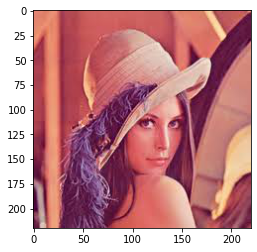

In [6]:
plt.imshow(imagem)

### Informações da Imagem

In [18]:
#dimensões
dim = imagem.shape

In [19]:
dim

(220, 220, 3)

### Trabalhando com Imagens Coloridas (RGB)
![](rgb.png)![image.png]
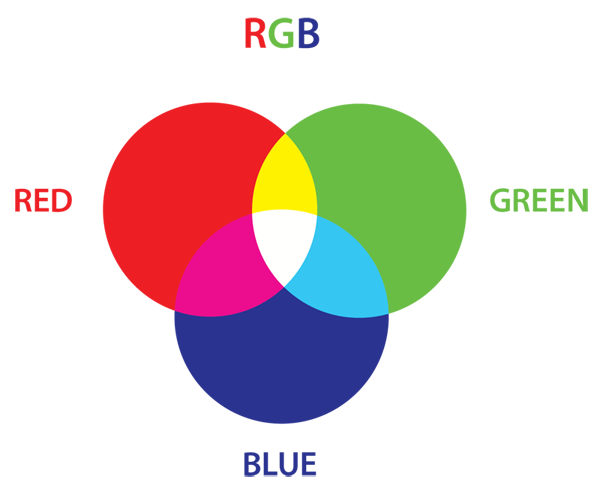

In [8]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]

In [9]:
blue.shape

(220, 220)

### Mostrar várias imagens

Text(0.5, 1.0, 'Canal Blue do Sistema de Cores RGB')

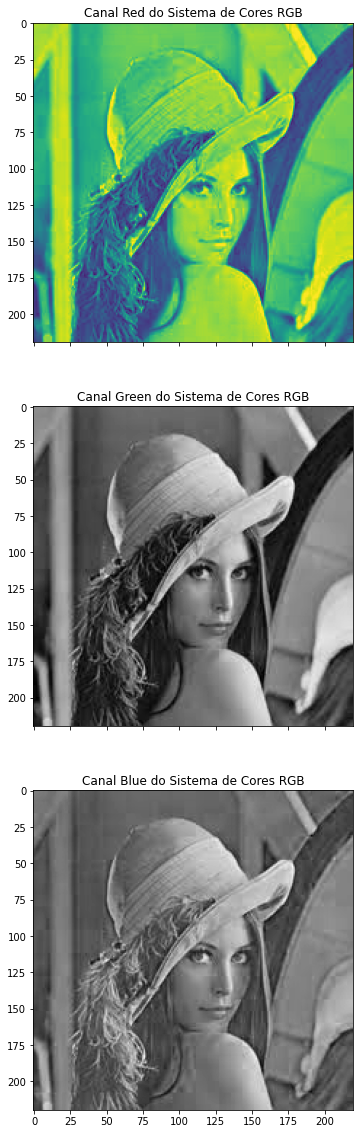

In [9]:
fig, ax = plt.subplots(3,1,figsize=(20, 20),sharex=True)
ax[0].imshow(red,cmap = 'gray')
ax[0].set_title('Canal Red do Sistema de Cores RGB')
ax[1].imshow(green,cmap = 'gray')
ax[1].set_title('Canal Green do Sistema de Cores RGB')
ax[2].imshow(blue,cmap = 'gray')
ax[2].set_title('Canal Blue do Sistema de Cores RGB')

### Níveis de cinza

$Y = 0.2125 R + 0.7154 G + 0.0721 B$

In [41]:
from skimage.color import rgb2gray

In [11]:
cinza = rgb2gray(imagem)

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

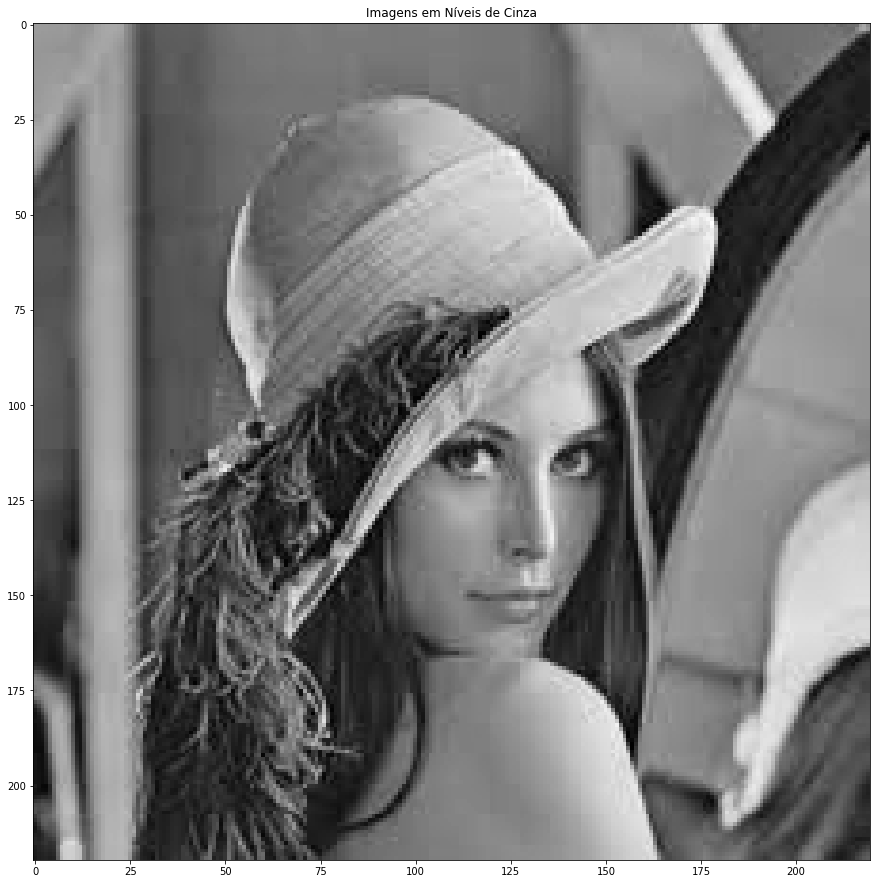

In [13]:
plt.figure(figsize=(15,30))
plt.imshow(cinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

### Salvar resultado

In [12]:
#importar a funcao imsave da biblioteca skimage
from skimage.io import imsave

In [16]:
imsave('aula_visao.png',cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Atividade

- Leia uma imagem
- Crie variáveis para armazenar cada componente do RGB
- Salve cada imagem em disco

In [ ]:
img = imread("logo.png")
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:2]
imsave('red.png',r)
imsave('green.png',g)
imsave('blue.png',b)

### Remoção de Ruídos

In [13]:
#importar função com filtro da media
from skimage.restoration import denoise_nl_means

In [14]:
cinza_filter = denoise_nl_means(cinza,100)

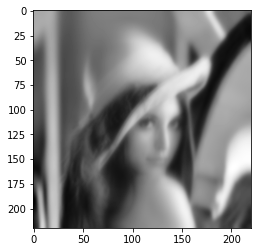

In [15]:
plt.imshow(cinza_filter,cmap = 'gray')

# Atividade: 

- Aplique o filtro da mediana em uma imagem de sua escolha com o tamanho de janela variando entre 3 e 13
- Plot os resultados e compare com a imagem original
- Analise os resultados obtidos

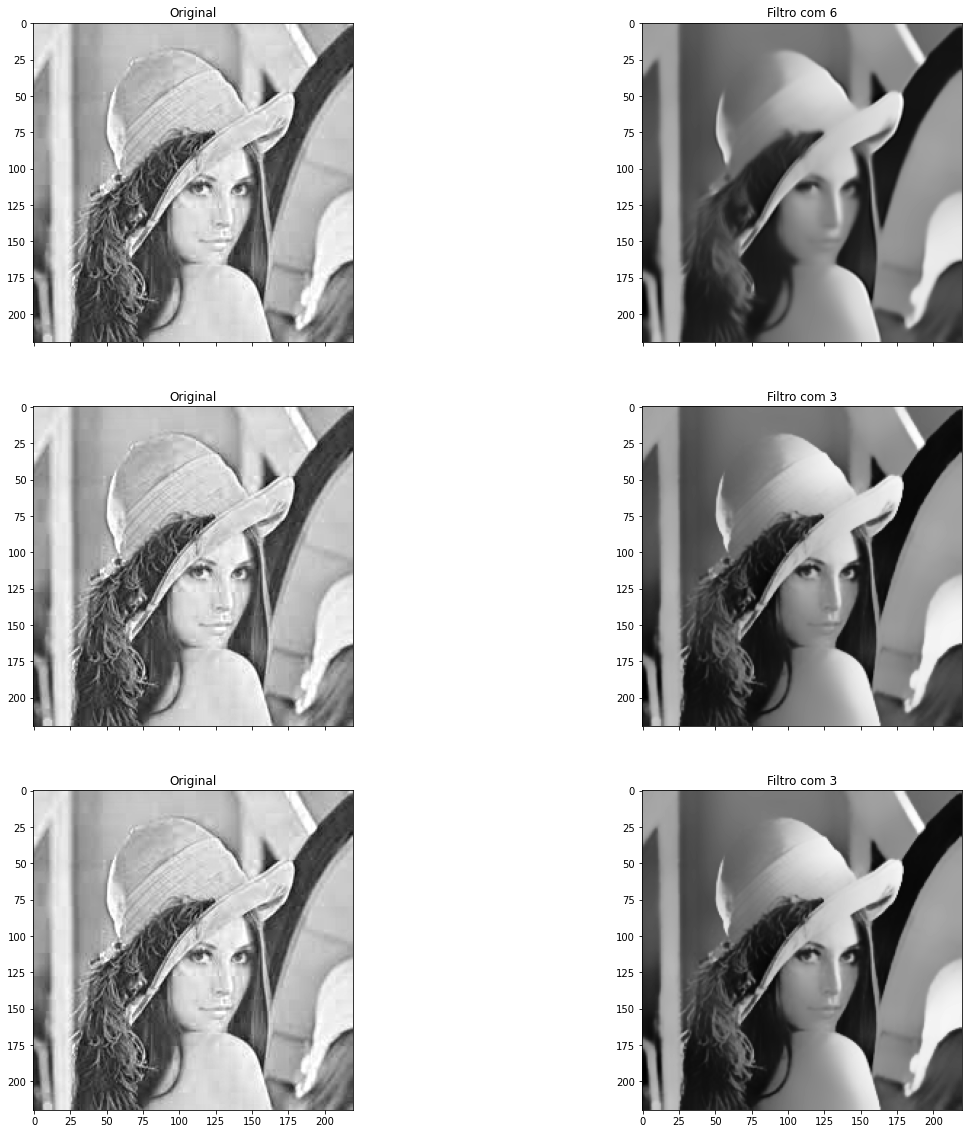

In [30]:
from random import randint

fig, ax = plt.subplots(3,2,figsize=(20, 20),sharex=True)
for i in range(3):
    k = randint(3,13)
    cinza_filter = denoise_nl_means(cinza,k)
    
    ax[i,0].imshow(red,cmap = 'gray')
    ax[i,0].set_title('Original')
    ax[i,1].imshow(cinza_filter,cmap = 'gray')
    ax[i,1].set_title(f'Filtro com {k}')

### Percorendo uma imagem

In [30]:
linhas,colunas,dimensao = imagem.shape #pegar dimensoes da imagem

In [31]:
for l in range(linhas):
    for c in range(colunas):
        if (imagem[l,c,1] < 150):
            imagem[l,c,1] = 0

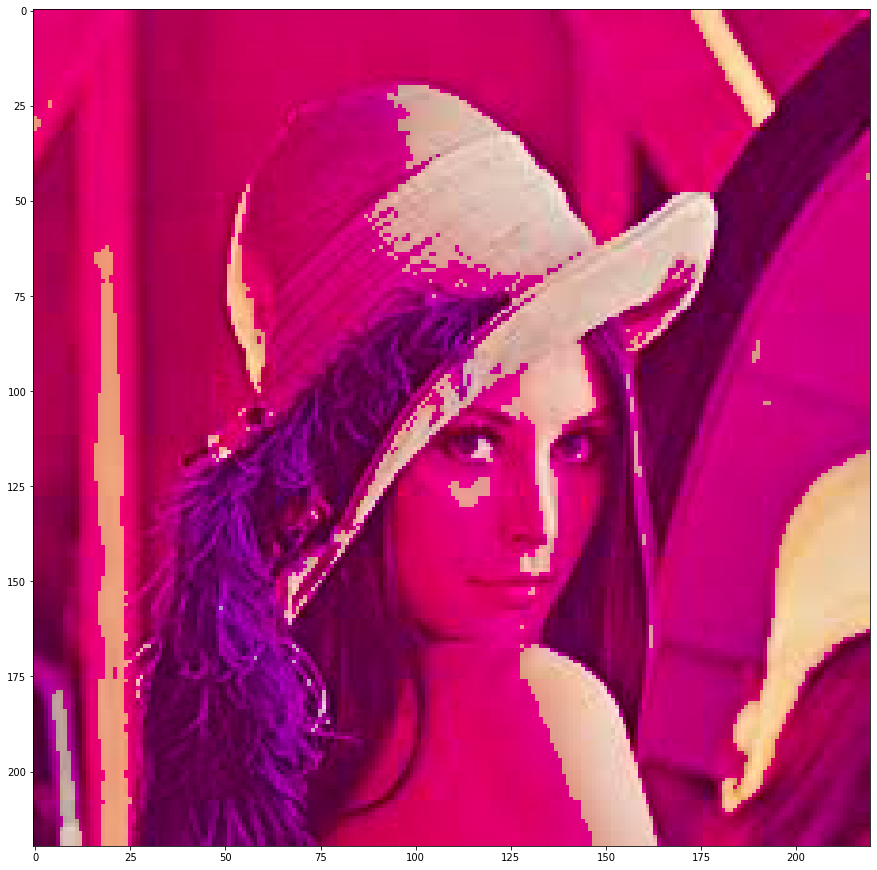

In [32]:
plt.figure(figsize=(15,30))
plt.imshow(imagem)

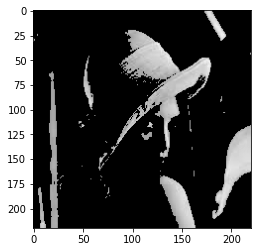

In [35]:
plt.imshow(imagem[:,:,1],cmap='gray')

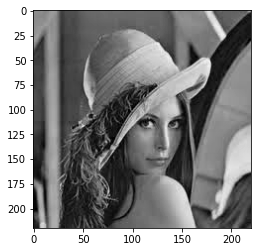

In [37]:
plt.imshow(imagem[:,:,1],cmap='gray')

## Atividade 
- Percorra sua imagem e ache o pixel com maior valor em cada uma das componentes

In [33]:
img = imread("pdi.png")
alt, larg, dim = img.shape

# Imagens Preto e Branco

In [40]:
import numpy as np
from skimage.filters import threshold_otsu

In [39]:
#método de Otsu

otsu = threshold_otsu(cinza)
preto_branco = (cinza < otsu)

NameError: name 'threshold_otsu' is not defined

In [64]:
otsu

0.43519245404411766

In [65]:
preto_branco

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

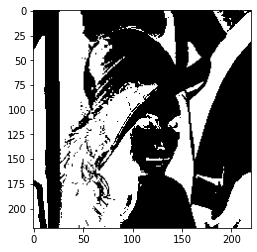

In [66]:
plt.imshow(preto_branco,cmap = 'gray')

# Atividade
- Faça uma binarização na imagem variando o limiar entre 0 e 1 com passos de 0.2
- Plot os resultados

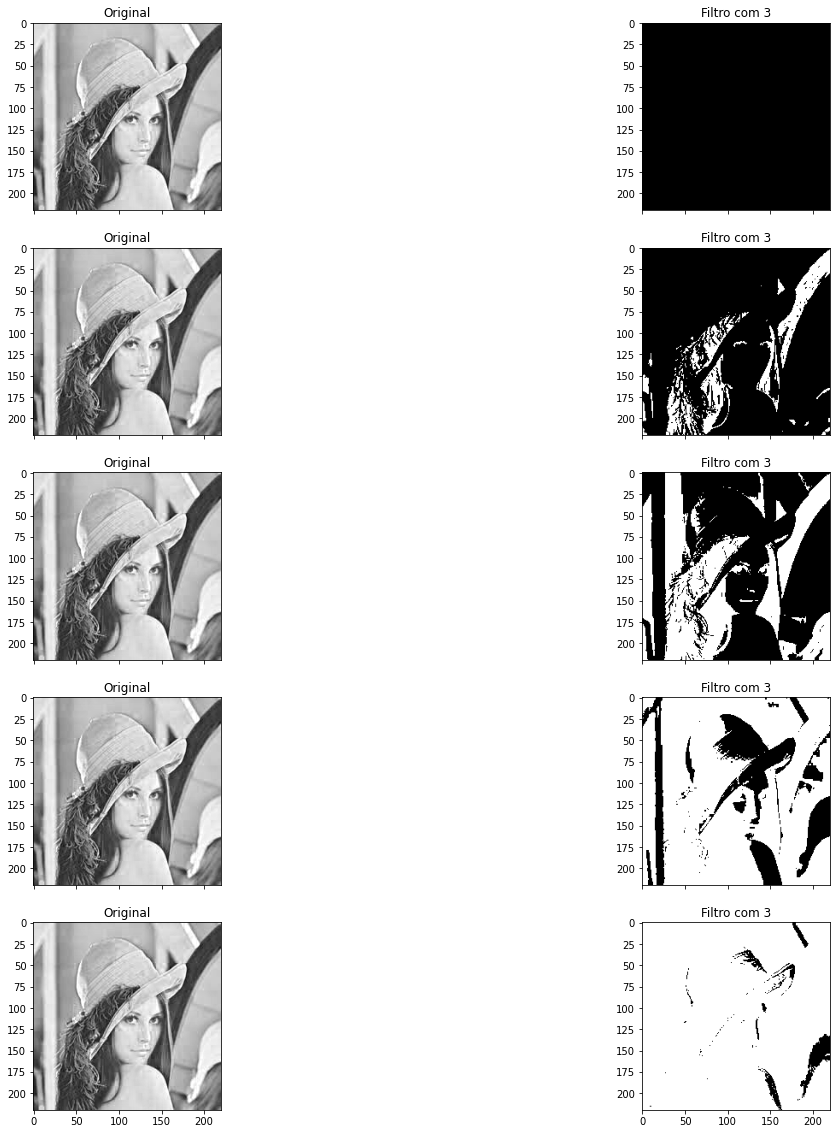

In [38]:
fig, ax = plt.subplots(5,2,figsize=(20, 20),sharex=True)
for otsu in range(0,10,2):
    i = int(otsu/2)
    cinza_filter = (cinza < otsu /10)
    
    ax[i,0].imshow(red,cmap = 'gray')
    ax[i,0].set_title('Original')
    ax[i,1].imshow(cinza_filter,cmap = 'gray')
    ax[i,1].set_title(f'Filtro com {k}')

### Encontrando Bordas

In [49]:
from skimage.filters import sobel,roberts,prewitt,scharr




In [68]:
contorno = sobel(preto_branco)

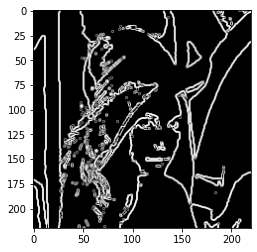

In [69]:
plt.imshow(contorno,cmap = 'gray')

## Atividade
- Transforme uma imagem para preto e branco
- Utilize outros métodos que não seja o de Sobel para encontrar as bordas. Ex: scharr, prewitt e roberts
- Faça um plot com todos os métodos que você utilizou

In [46]:
img = imread("lenna.jpg")
cinza = rgb2gray(img)
otsu = threshold_otsu(cinza)
pb = (cinza < otsu)

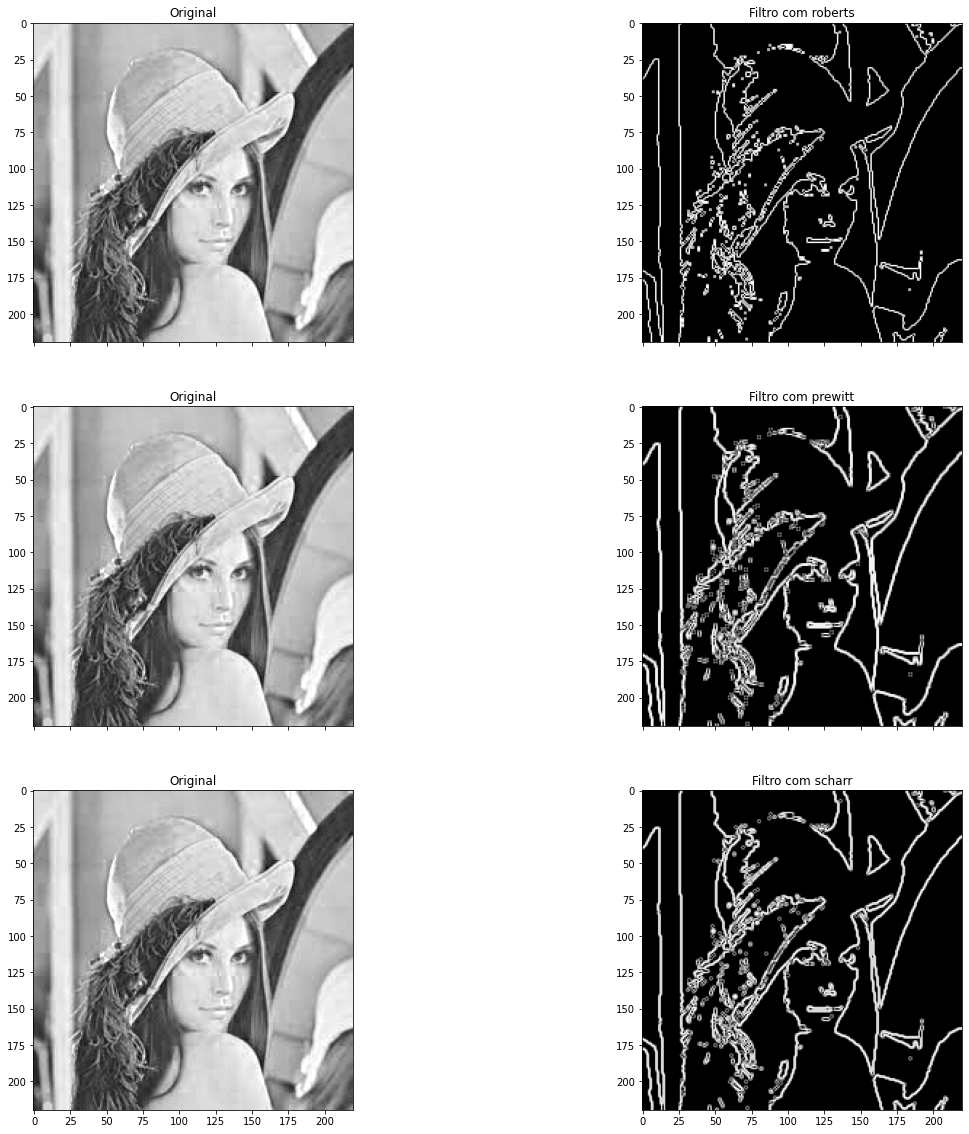

In [60]:
lista = [roberts,prewitt,scharr]
names = ["roberts","prewitt","scharr"]
fig, ax = plt.subplots(3,2,figsize=(20, 20),sharex=True)
for i in range(len(lista)):

    contorno = lista[i](pb)
    
    ax[i,0].imshow(red,cmap = 'gray')
    ax[i,0].set_title('Original')
    ax[i,1].imshow(contorno,cmap = 'gray')
    ax[i,1].set_title(f'Filtro com {names[i]}')

### Recortes em Imagens

In [82]:
recorte_imagem = imagem[110:120,100:150,:]

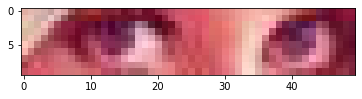

In [83]:
plt.imshow(recorte_imagem)

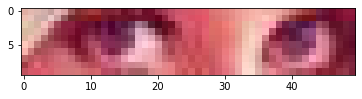

In [84]:
plt.imshow(recorte_imagem,cmap='gray')

In [71]:
recorte_imagem

array([], shape=(120, 0, 3), dtype=uint8)

### Desenhar formas geométricas

In [94]:
from skimage.draw import rectangle,rectangle_perimeter

In [103]:
start = (110, 100)
extent = (10,50)
rr, cc = rectangle_perimeter(start, extent=extent, shape=imagem.shape)
imagem[rr, cc,:] = [255,0,0]

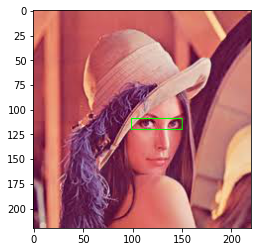

In [104]:
plt.imshow(imagem)

In [105]:
rr

array([109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109])

In [106]:
cc

array([ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
       136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99])